<a href="https://colab.research.google.com/github/hendragff/ds_101/blob/main/student_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
dataloc = ('/content/drive/My Drive/Python/')
dataku = (dataloc + 'Maths.csv')

# hal pertama yang harus dilakukan adalah import data, disini saya menggunakan data yang diambil dari google drive
# variabel dataloc dan dataku berisi path file dan nama file yang akan digunakan

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# import semua library yang dibutuhkan untuk mengolah data. Mulai dari numpy untuk operasi matematika, pandas untuk manipulasi data, seaborn, matplotlib, 
# dan plotly express untuk visualisasi data. Dengan warnings.filterwarnings('ignore') berfungsi untuk mengabaikan warning di python

# Data Preparation

In [ ]:
dipake = pd.read_csv(dataku)
dipake

# variabel dipake berisi dataframe yang dibuat dengan library pandas dengan tipe file csv (comma separated value) yang ringan
# dataframe ini memiliki 395 record dan 33 kolom
# data ini berisi tentang prestasi siswa di dua sekolah Portugis. Atribut data meliputi nilai siswa, demografi, fitur terkait sosial dan sekolah). Menurut sumber, data dikumpulkan dengan menggunakan laporan sekolah dan kuesioner yang diberikan ke siswa.
# ada 2 mata pelajaran yang diperhatikan di dataset ini, yaitu matematika dan bahasa portugis

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
dipake.shape[1]

# fungsi .shape[1] akan menghitung dimensi/jumlah kolom yang ada di dalam dataset
# terhitung ada 33 kolom yang ada di dalam dataset

33

# Data Preprocessing

In [ ]:
inuse = dipake.copy()
inuse

# untuk mencegah hilangnya data asli, disini saya membuat salinan data asli untuk diolah lebih lanjut

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
inuse.info()

# dataframe ini memiliki 395 record dan 33 kolom
# berisi 16 data numeric dan 17 data nominal
# untuk mengetahui isi data yang ada di dalam dataset, fungsi .info() digunakan untuk menampilkan rangkuman data di dalam dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
inuse.isna().sum()

# fungsi .isna() digunakan untuk memeriksa apakah terdapat data yang null, sedangkan fungsi .sum() digunakan untuk menghitung jumlah data null dan memberikan output berupa angka
# dari output dibawah, bisa dilihat jika dataset yang digunakan sudah tidak terdapat data null, sehingga tidak perlu dibersihkan

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Data Visualization

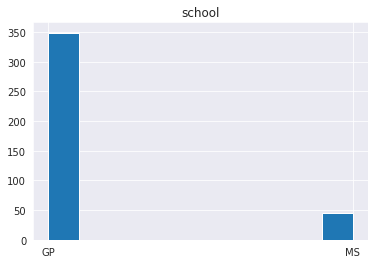

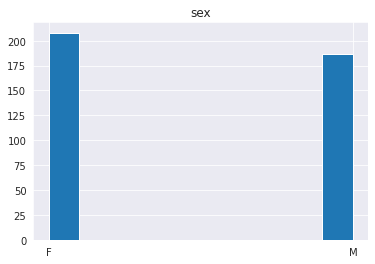

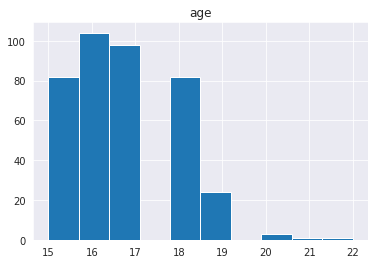

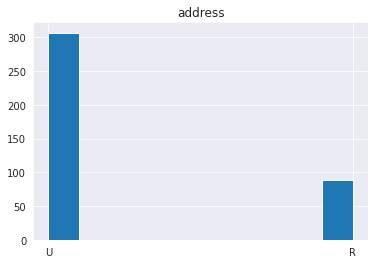

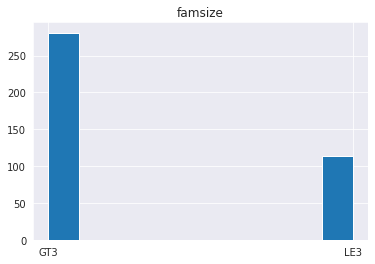

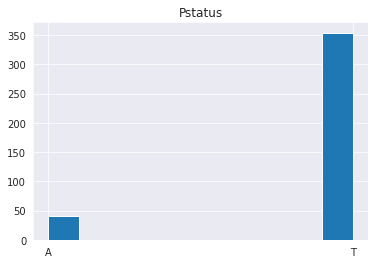

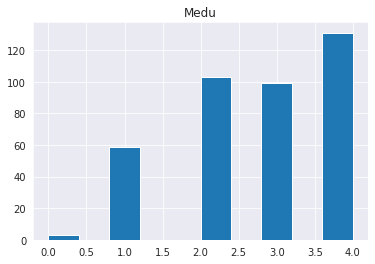

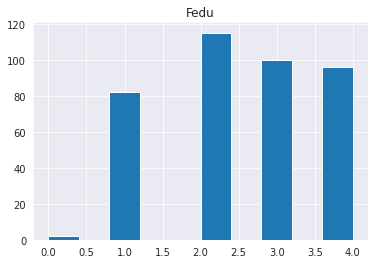

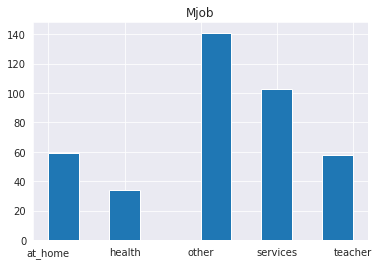

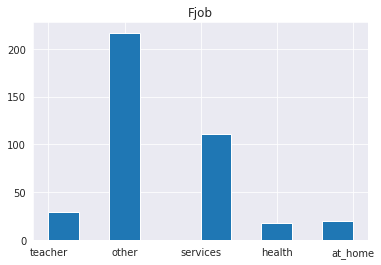

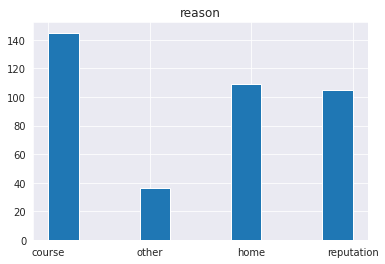

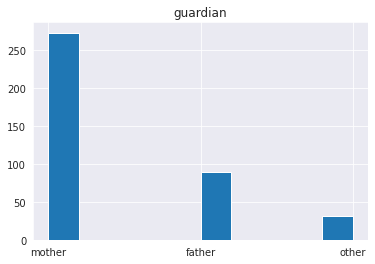

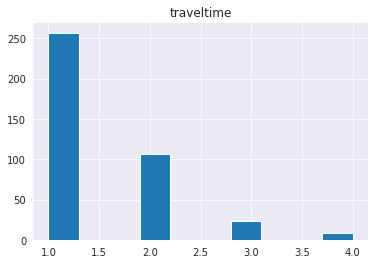

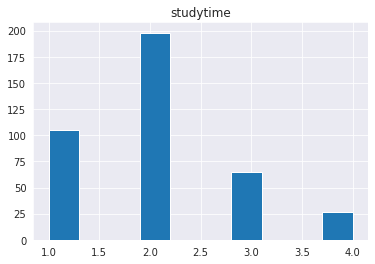

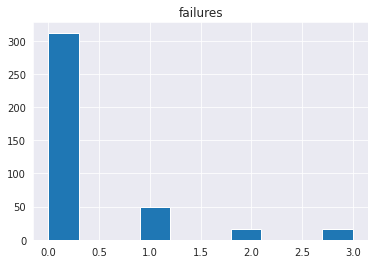

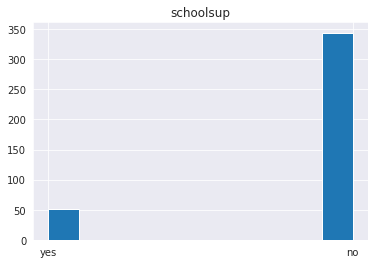

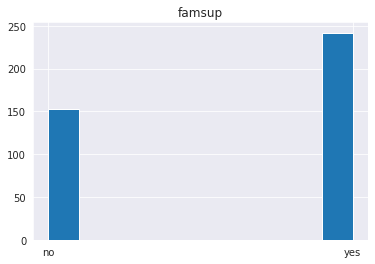

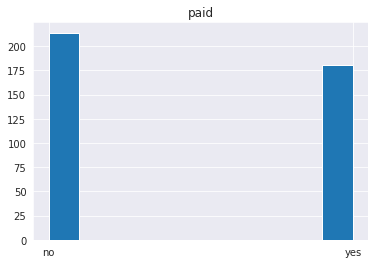

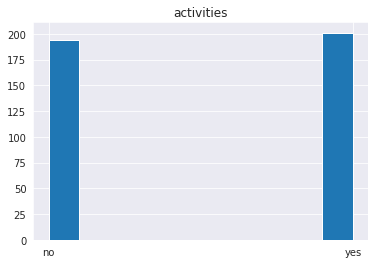

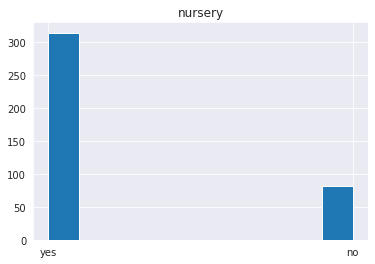

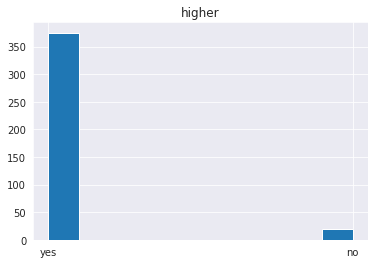

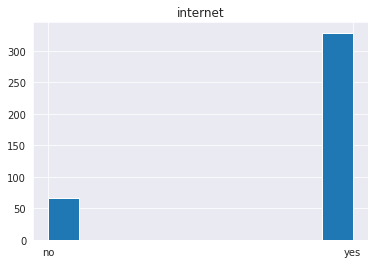

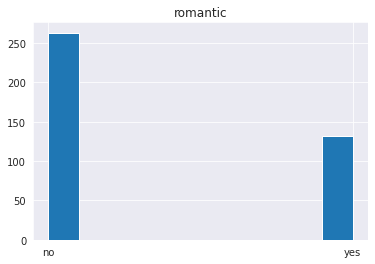

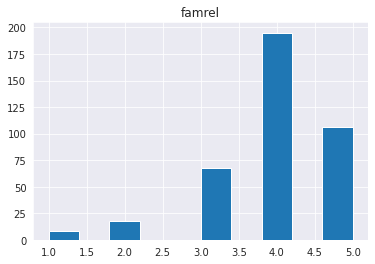

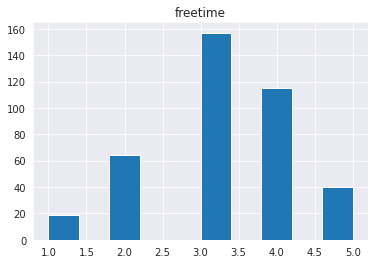

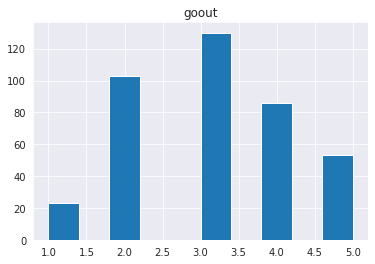

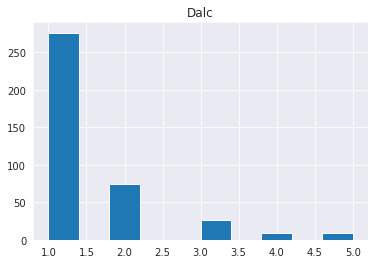

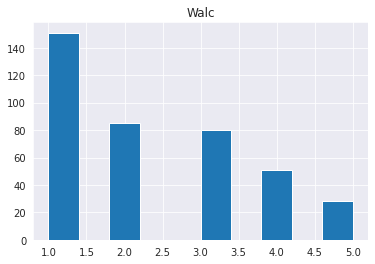

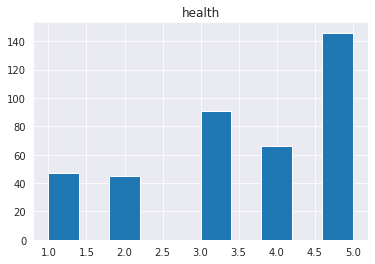

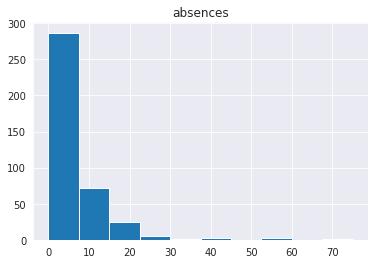

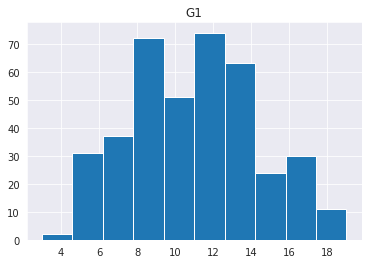

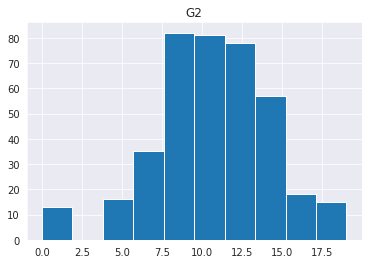

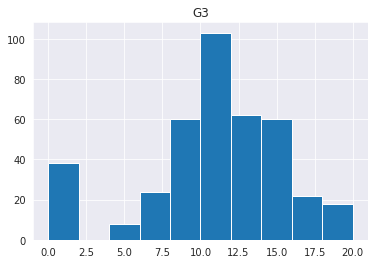

In [ ]:
for i in inuse.columns:
  plt.hist(inuse[i])
  plt.title(i)
  plt.show()

# untuk melihat persebaran data di dalam dataset, metode yang sering digunakan adalah histogram.
# dengan me-looping semua kolom yang ada di dalam dataset, maka akan menghasilkan output berupa histogram semua kolom di dataset
# fungsi .title() digunakan untuk memberikan judul di tiap grafik
# sedangkan parameter i diambil dari hasil looping semua tabel di dataset
# fungsi .show() digunakan untuk menampilkan semua grafik yang telah dibuat menggunakan library matplotlib

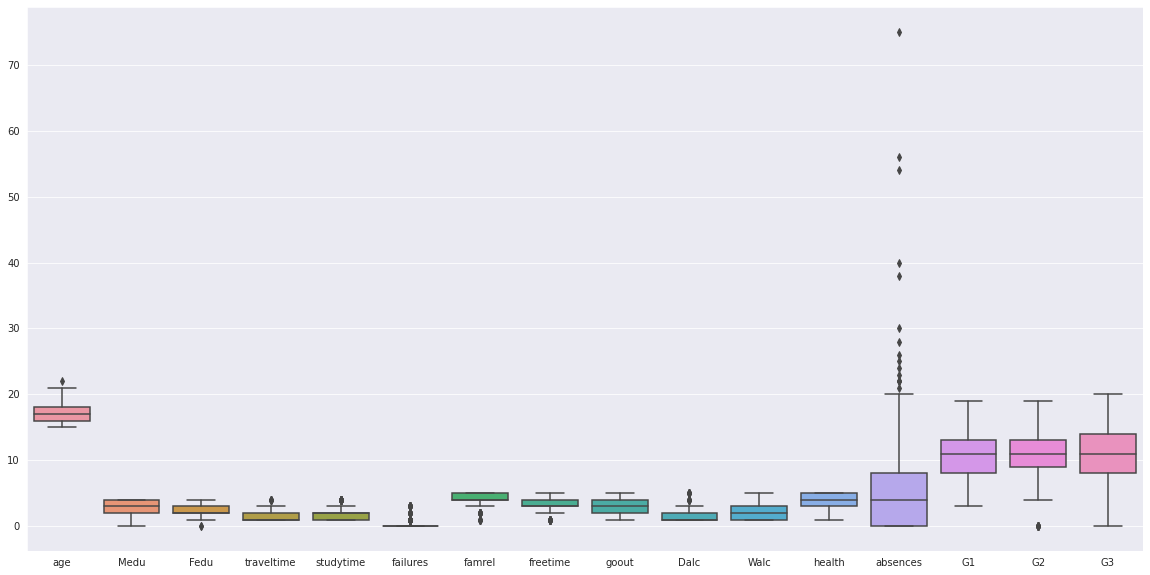

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(data = inuse)

# untuk melihat persebaran data dan outlier, boxplot sangat cocok digunakan untuk ini
# bisa dilihat banyak kolom yang memiliki banyak outlier juga, terlebih pada kolom absences 
# garis di tengah kotak dalam boxplot merupakan garis yang menggambarkan median
# bentuk kotaknya merupakan interquartile range
# dan area garis di luar kotak menggambarkan masing-masing 25% data

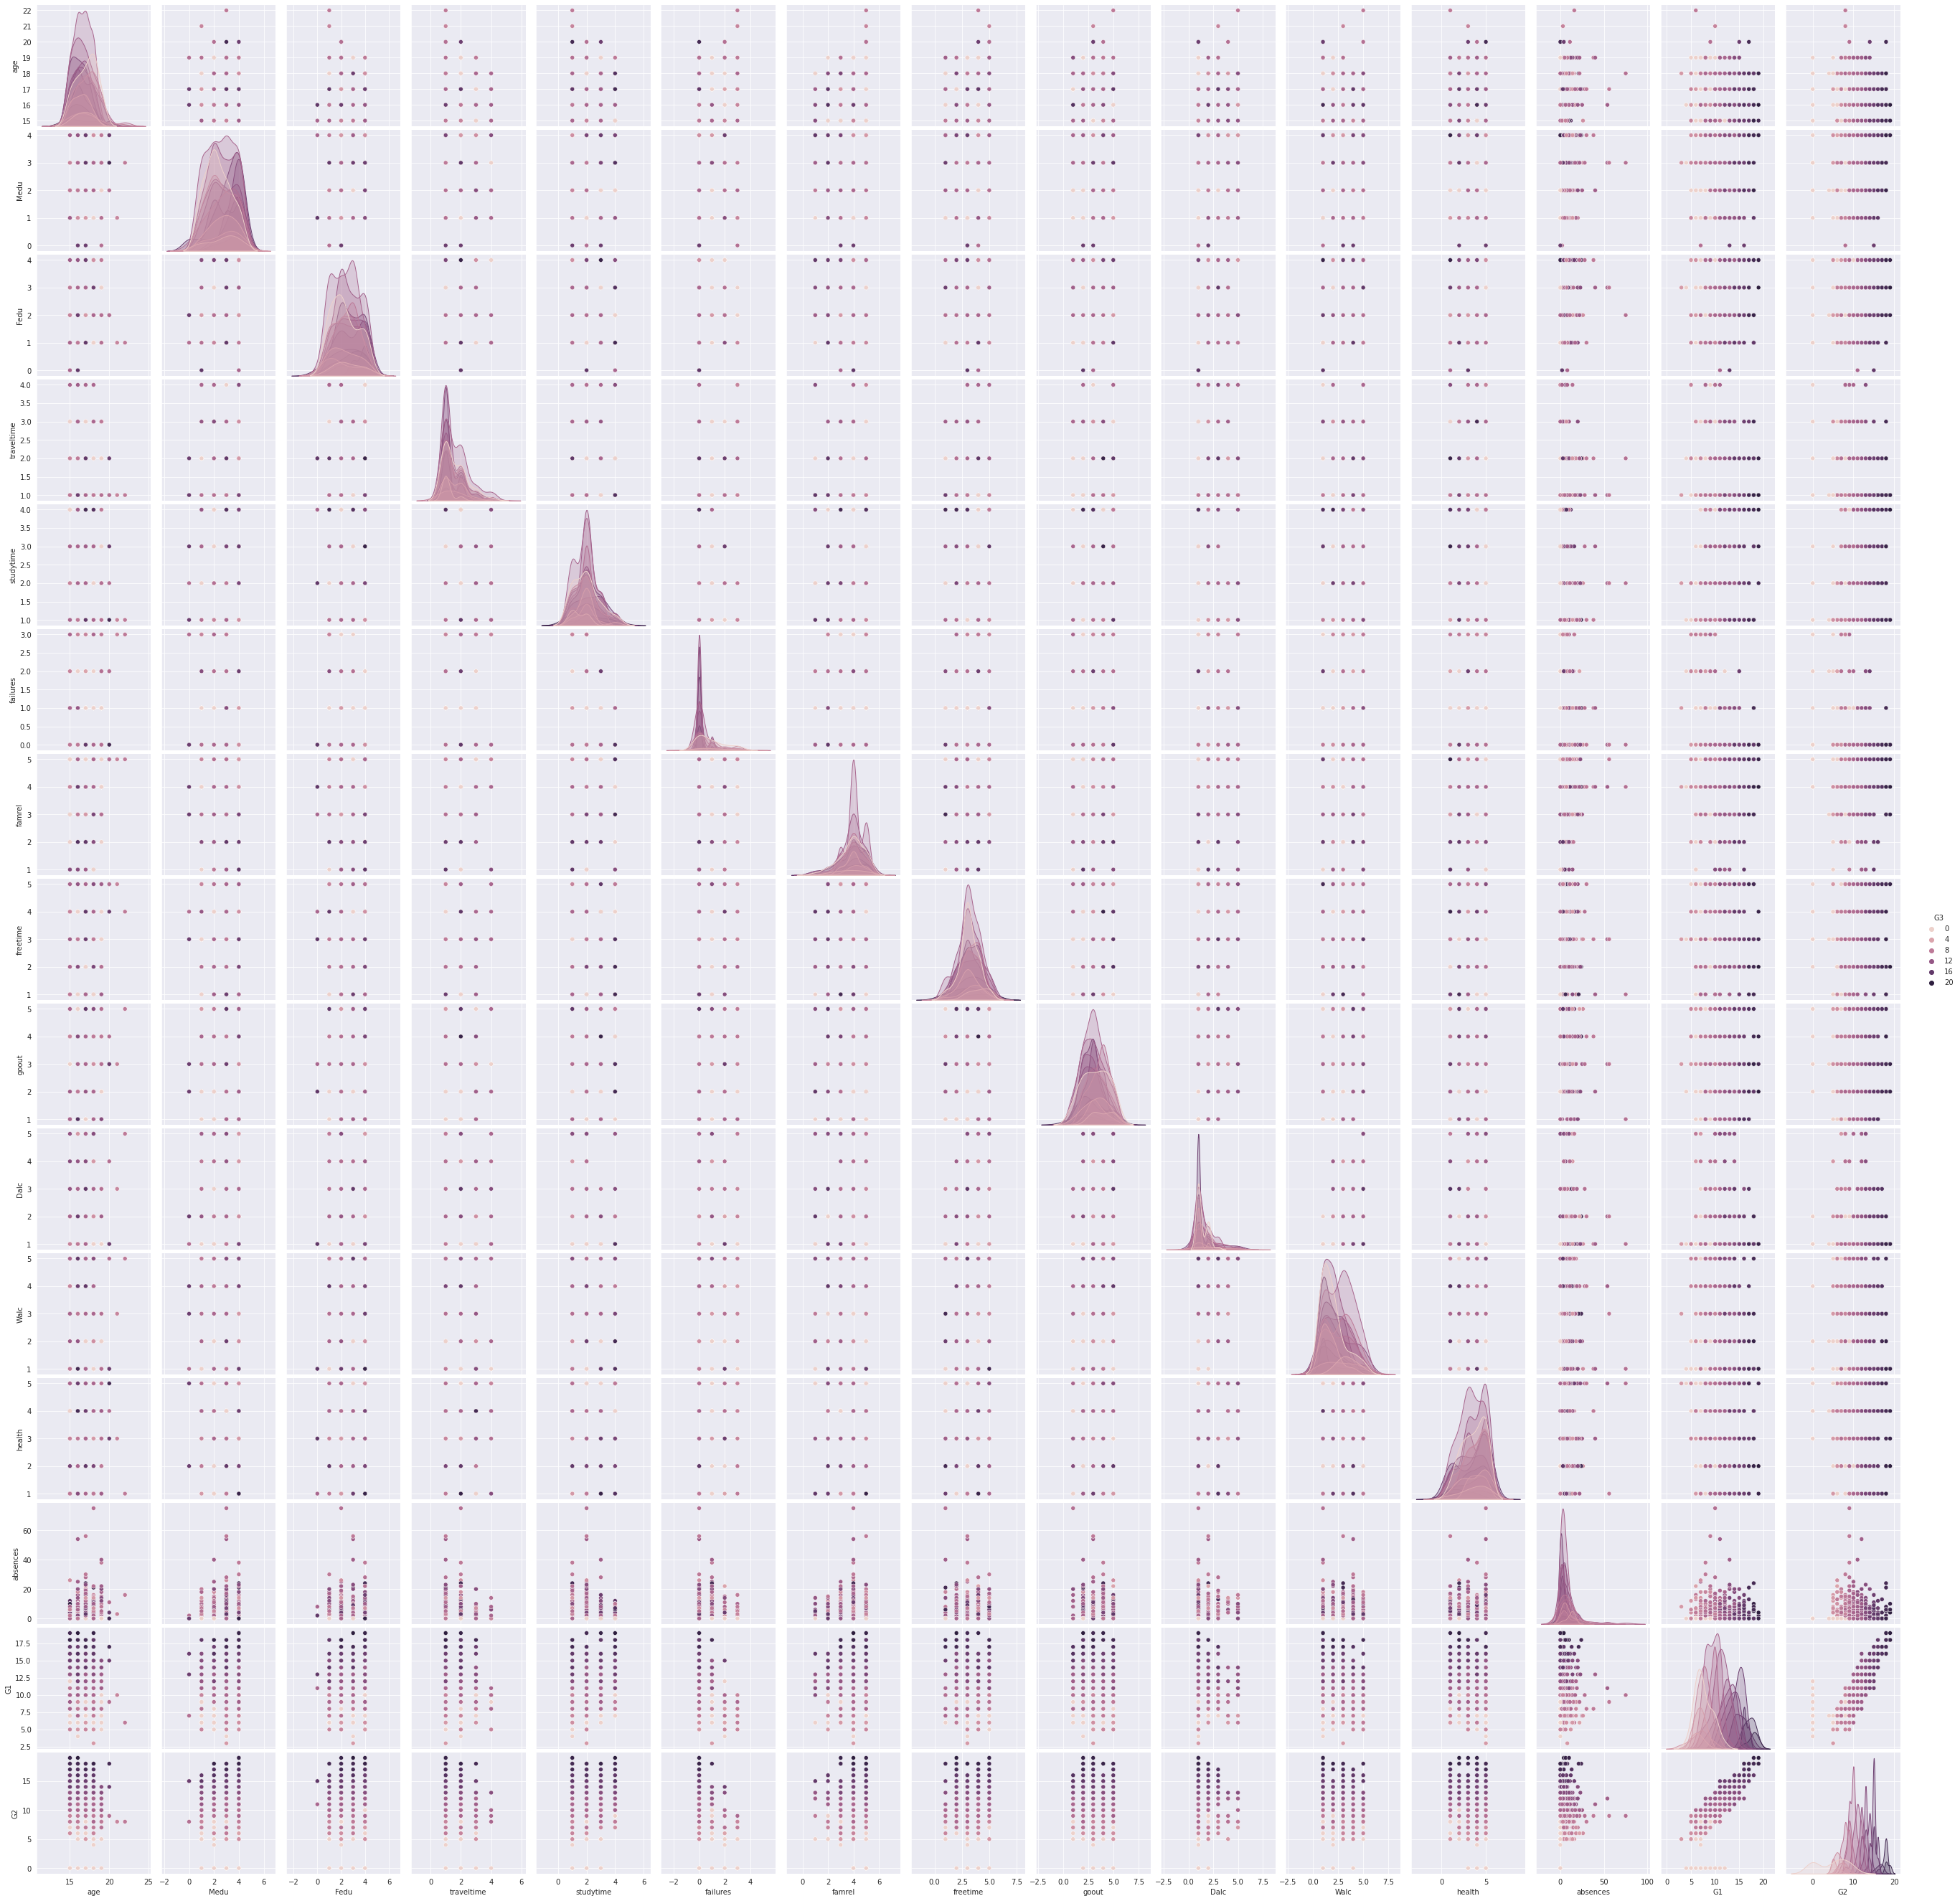

In [ ]:
sns.pairplot(inuse, hue="G3")

# .pairplot() digunakan untuk melihat korelasi antar variabel secara lebih luas dan gamblang
# menggunakan parameter nilai dari kolom G3 sebagai nilai pembeda
# semua yang ditampilkan disini merupakan semua kolom yang ada di dalam dataset
# bisa dilihat bahwa banyak yang tidak memiliki korelasi yang baik antar variabel, namun di variabel G1 G2, dan G3 memiliki korelasi yang bagus antar ketiganya

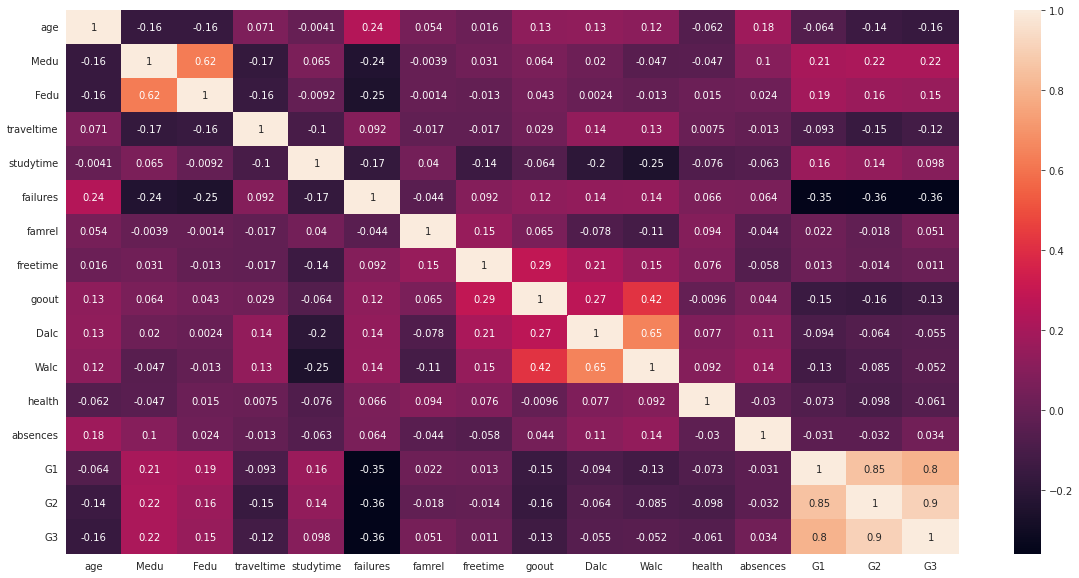

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(inuse.corr(),annot=True)

# untuk menggambarkan korelasi antar variabel secara numerik, .heatmap() cocok untuk digunakan
# korelasi yang baik adalah korelasi yang mendekati angka 1
# parameter yang digunakan adalah fungsi .corr() yang digunakan untuk melihat adanya korelasi, annot=True digunakan untuk menambahkan keterangan yang ada di pinggir visualisasi
# korelasi terbaik di dataset ini adalah hubungan antara nilai semester 1-3 (G1, G2, G3)

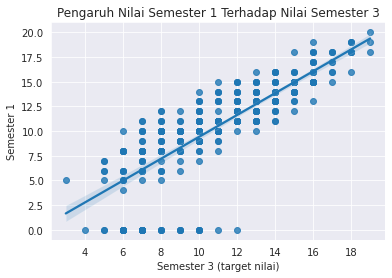

In [ ]:
sns.regplot(x = 'G1', y = 'G3', data=inuse)
plt.xlabel('Semester 3 (target nilai)')
plt.ylabel('Semester 1')
plt.title('Pengaruh Nilai Semester 1 Terhadap Nilai Semester 3')
plt.show()

# dalam parameter regplot, data sumbu x diambil dari kolom dataframe inuse G1, sedangkan sumbu y berasal dari kolom G3 pada dataframe yang sama. parameter data digunakan untuk menginisasi dataframe yang digunakan
# Visualisasi ini menunjukkan jika sebuah variabel berkorelasi secara linear positif dengan variabel lainnya, maka akan membentuk garis regresi yang membentuk diagonal yang menaik dari kiri bawah ke kanan atas
# namun jika sebuah data memiliki korelasi data mendekati -1, maka garis yang akan dibentuk akan menjadi diagonal menurun
# namun bisa dilihat juga ada beberapa data yang terletak di bawah adalah data yang tidak berkorelasi
# garis yang membelah titik tersebut dinamakan garis regresi
# visualisasi ini juga memberikan kesimpulan jika semakin tinggi nilai semester 1, maka semakin tinggi juga nilai semester 3  

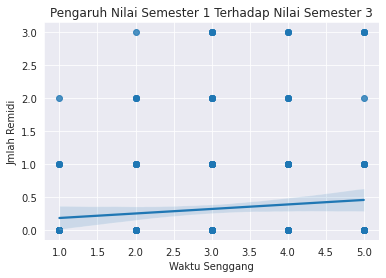

In [ ]:
sns.regplot(x = inuse['freetime'], y = inuse['failures'], data=inuse)
plt.xlabel('Waktu Senggang')
plt.ylabel('Jmlah Remidi')
plt.title('Pengaruh Nilai Semester 1 Terhadap Nilai Semester 3')
plt.show()

# .regplot() digunakan untuk menampilkan plot data sekaligus regresi linearnya
# fungsi xlabel() digunakan untuk memberikan untuk memberikan label pada sumbu X, sedangkan ylabel() untuk sumbu y
# kebalikan dari visualisasi sebelumnya, grafik ini menunjukkan bagaimana data yang tidak saling berkorelasi ditunjukkan
# garis regresinya hampir lurus dan titik value juga tidak menunjukkan adanya korelasi secara linear

# Don't sure about this, but why not

saya sebagai pembuat kode dibawah ini tidak yakin dengan hasil yang akan dikeluarkan, error yang akan terjadi, kesalahan dalam penjelasan yang saya buat, dan segala kekurangan didalamnya. Saya mohon maaf. Dikarenakan ini adalah kali pertama saya membuat modelling di machine learning. Namun saya mendapat perintah untuk melakukan yang terbaik yang saya bisa

hence the name "Don't sure about this, but why not"


In [ ]:
baru = pd.DataFrame().assign(Mjob=inuse['Mjob'], Fjob=inuse['Fjob'], higher = inuse['higher'])
baru

# variabel baru mengandung dataset yang akan digunakan untuk machine learning menggunakan metode klasifikasi menggunakan decision tree
# semua kolom diambil dari dataframe inuse, yang diambil adalah kolom Mjob, Fjob, dan higher
# identifikasi masalah kali ini adalah untuk mengetahui hubungan antara profil pekerjaan orang tua dan keinginan siswa untuk melanjutkan pendidikan lebih lanjut 

,Mjob,Fjob,higher
0,at_home,teacher,yes
1,at_home,other,yes
2,at_home,other,yes
3,health,services,yes
4,other,other,yes
...,...,...,...
390,services,services,yes
391,services,services,yes
392,other,other,yes
393,services,other,yes


In [ ]:
inputs = baru.drop('higher', axis = 'columns')
target = baru['higher'].replace(["yes","no"], value=["1","0"])

# karena input untuk klasifikasi kali ini adalah higher, maka kolom higher dihapus dari variabel inputs dan hanya menyisakan Fjob dan Mjob
# namun karena higher menjadi target, variabel target diisi hanya dengan kolom higher
# karena machine learning hanya memahami angka, maka value yes dan no dalam dataset di ganti dengan angka 1 dan 0

In [ ]:
from sklearn.preprocessing import LabelEncoder
momjob = LabelEncoder()
dadjob = LabelEncoder()

inputs['dadjob'] = dadjob.fit_transform(inputs['Fjob'])
inputs['momjob'] = dadjob.fit_transform(inputs['Mjob'])

inputs

# lagi, karena machine learning hanya memahami angka, maka LabelEncoder dari sklearn dapat digunakan untuk memberikan label berupa angka pada value nominal yang berbeda di dataset
# variabel dadjob dan momjob masing-masing berisi value kolom Fjob dan Mjob yang telah diberi label berupa angka
# .fit_transform digunakan untuk menghitung mean dan varians dari masing-masing fitur yang ada dalam dataset. Metode transform adalah mentransformasikan semua fitur menggunakan mean dan varians masing-masing. (dalam konteks ini adalah label tiap value)

,Mjob,Fjob,dadjob,momjob
0,at_home,teacher,4,0
1,at_home,other,2,0
2,at_home,other,2,0
3,health,services,3,1
4,other,other,2,2
...,...,...,...,...
390,services,services,3,3
391,services,services,3,3
392,other,other,2,2
393,services,other,2,3


In [ ]:
inputs_num = inputs.drop(['Fjob','Mjob'], axis = 'columns')
inputs_num

# dan lagi, karena  machine learning hanya mengerti angka, maka variabel dataset baru yang akan digunakan akan berisi label dari Fjob dan Mjob yang telah diubah menjadi dadjob dan Fjob

,dadjob,momjob
0,4,0
1,2,0
2,2,0
3,3,1
4,2,2
...,...,...
390,3,3
391,3,3
392,2,2
393,2,3


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_num, target)
model.score(inputs_num,target)

# disini adalah bagian untuk import library untuk decision tree
# variabel model berisi algoritma dari decision tree itu sendiri
# model.fit() digunakan untuk memberikan data train pada machine learning, data yang digunakan berasal dari dataset inputs_num dan target
# model.score() digunakan untuk menilai akurasi prediksi dari data pada dataset inputs_num dan target, nilai yang dihasilkan adalah sekitar 0.9. Sebuah nilai yang bagus karena semakin dekat dengan angka 1

0.9493670886075949

dikarenakan kurangnya pengetahuan dan sumber buat confussion matrixnya, mohon maaf mas ga lengkap 🙏